# Data Exploration

## Understanding our data

#### Import and load

In [78]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.figure_factory as ff
import plotly.offline as pyo
import numpy as np

In [50]:
# Load dataset
df = pd.read_csv('creditcard.csv')
df_modified = df.copy()

#### Basic info

In [51]:
# Basic info
print(df.shape)
print(df.head(5))
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df['Class'].value_counts())
print(df.columns)


(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

#### Duplicates

In [52]:
# Duplicated rows
df_duplicated = df[df.duplicated(keep=False)]
print(df_duplicated.shape)

df_duplicated.head(4)

(1854, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0


In [53]:
# Delete duplicated rows 
def del_duplicated(df: pd.DataFrame) -> pd.DataFrame:
    """Delete duplicated rows 

    Args:
        df (Pandas Dataframe): Dataframe to be cleaned

    Returns:
        Pandas Dataframe: Dataframe without duplicated rows
    """
    df.drop_duplicates(inplace=True)
    return df

In [54]:
# Remove duplicated rows
df_modified = del_duplicated(df_modified)

#### Visualization of distributions

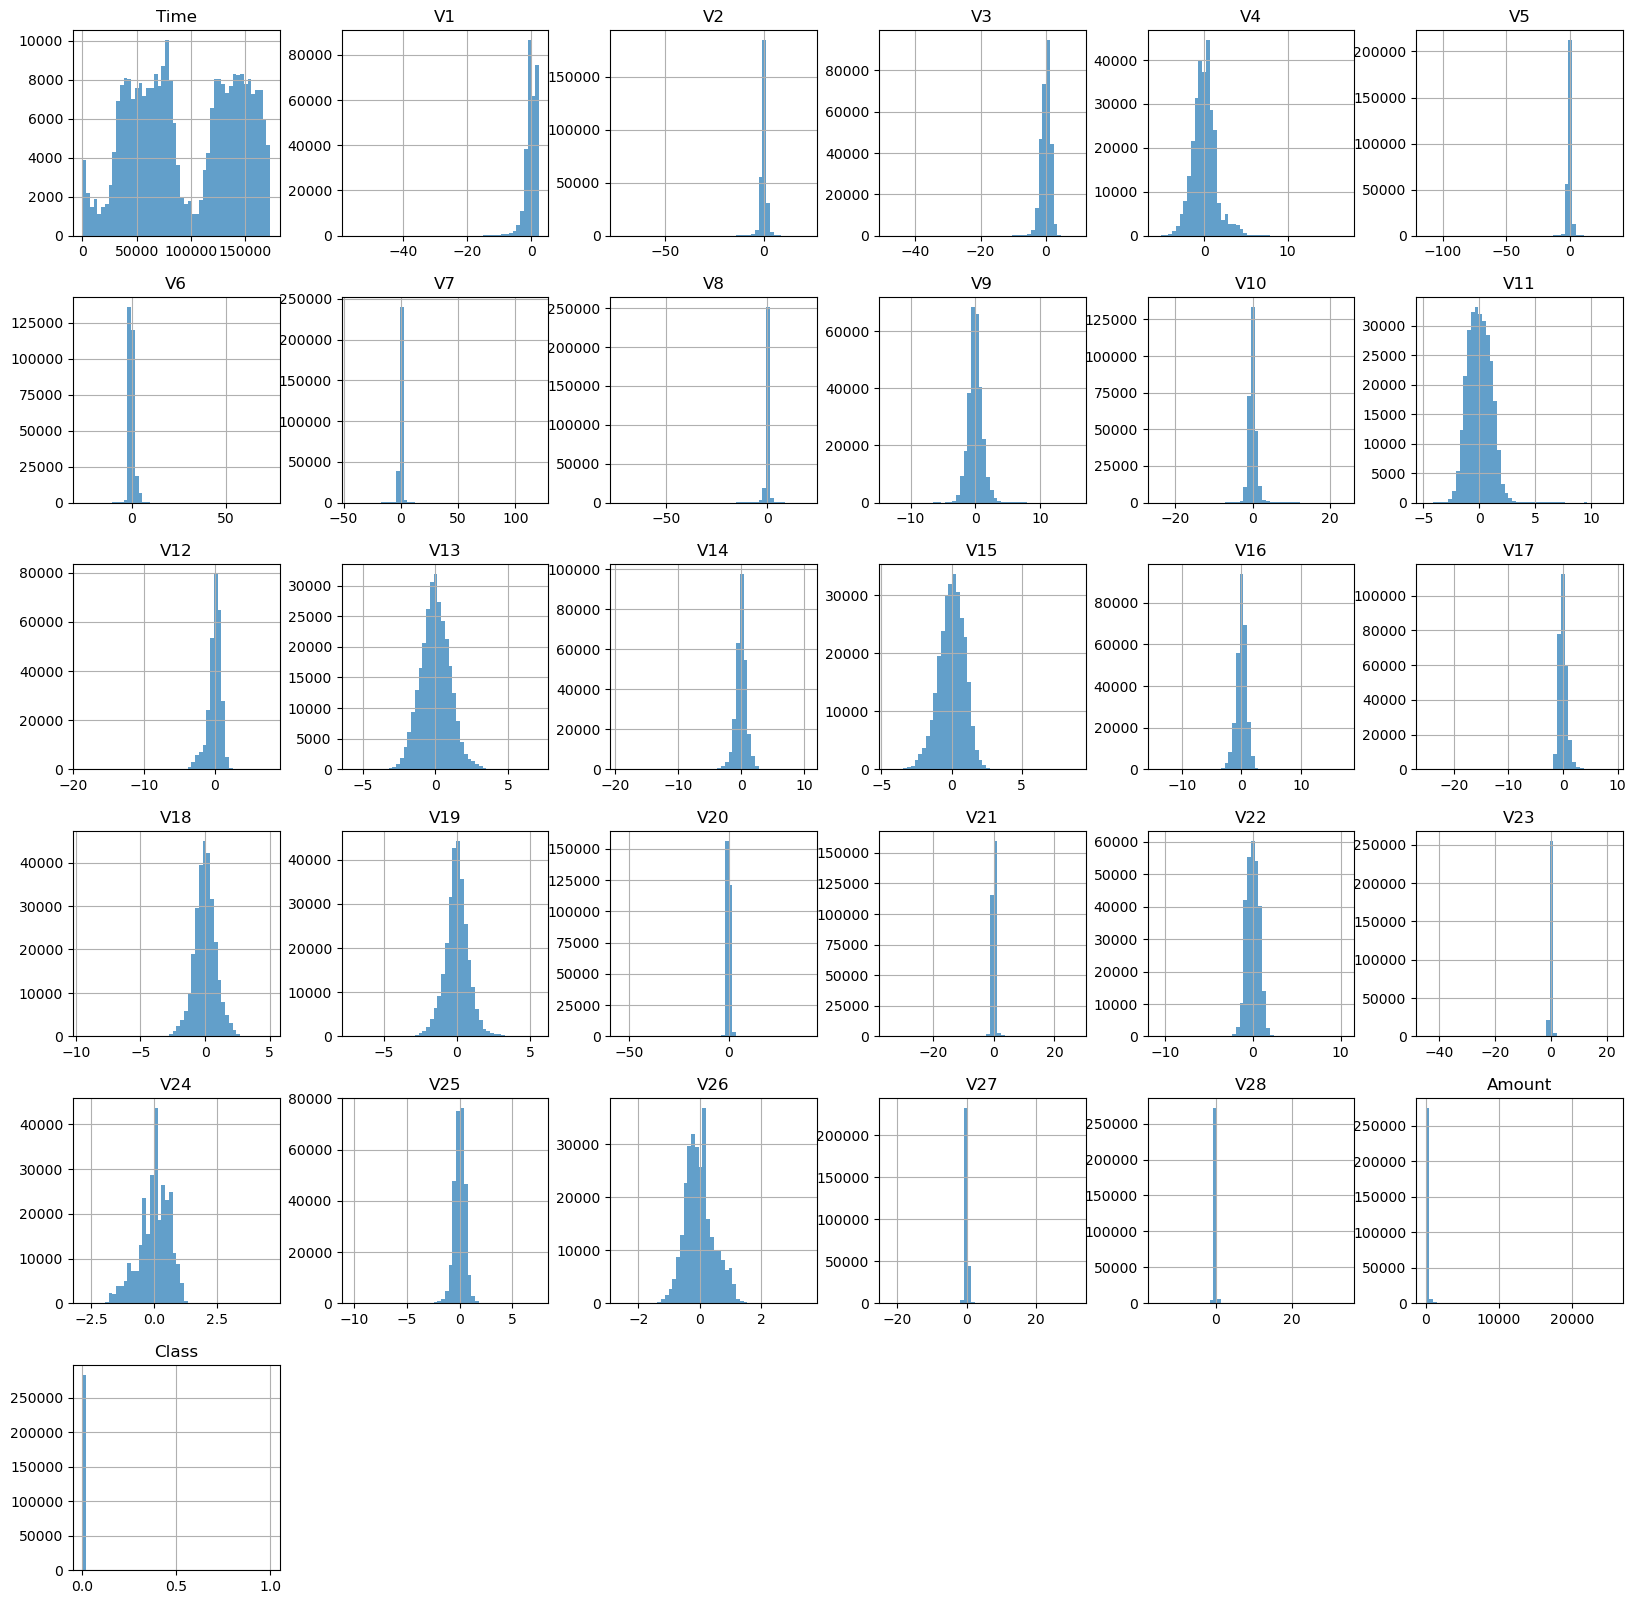

In [7]:
# Plot of histogram
# x: features values
# y: frequency 

df_modified.hist(figsize=(20,20), bins=50, alpha=0.7)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


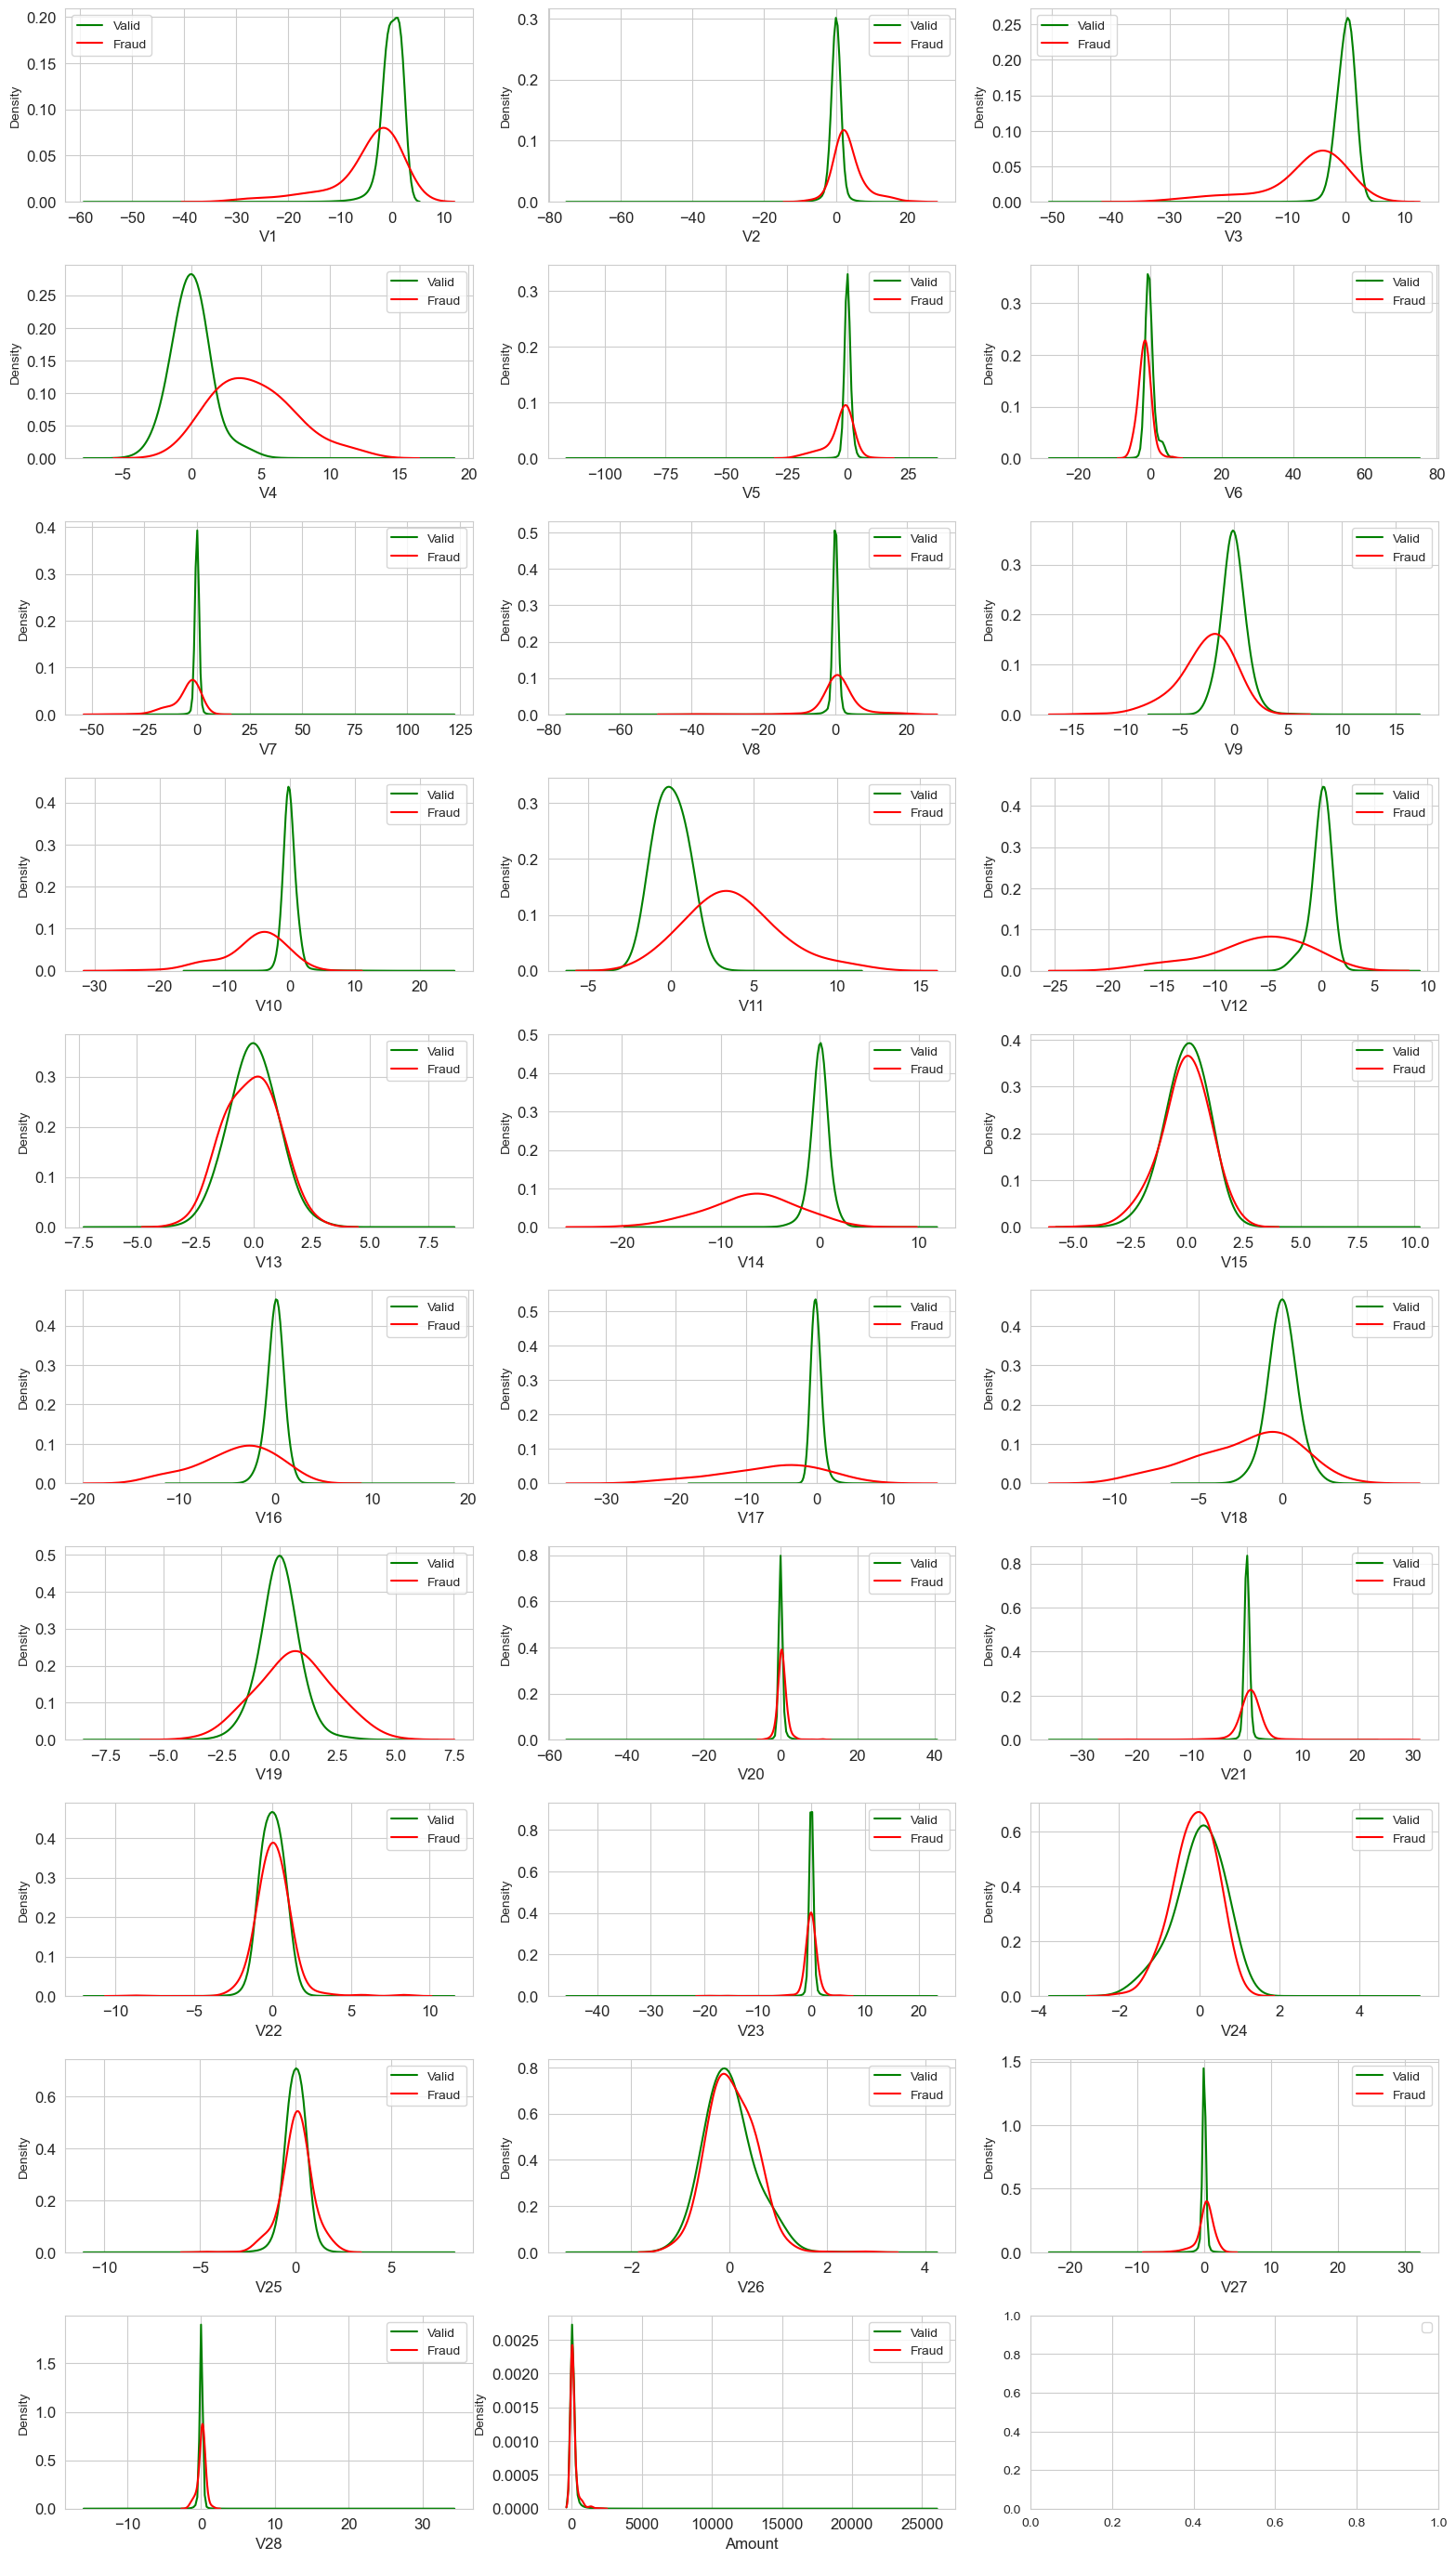

In [76]:
# Credit Card Fraud Transactions Features Distribution for Fraud and Non-Fraud
    
# Ignore UserWarnings
warnings.simplefilter(action='ignore', category=UserWarning)

# save df_modified.columns.values except Time and Class because the distribution is not needed to be analyzed
var = df_modified.columns.values[1:-1]

fig, axes = plt.subplots(10,3,figsize=(16,28))
# Adjust the layout
fig.tight_layout(pad=3.0)  

t0 = df_modified.loc[df_modified['Class'] == 0]
t1 = df_modified.loc[df_modified['Class'] == 1]

for i, feature in enumerate(var):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
    sns.kdeplot(t0[feature], bw=0.5, label="Valid", color='green', ax=ax)
    sns.kdeplot(t1[feature], bw=0.5, label="Fraud", color='red', ax=ax)
    
    ax.set_xlabel(feature, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend()

# Add legend to the last plot
axes[-1, -1].legend()

plt.show()

In [8]:
# Determine number of fraud cases in dataset

Fraud = df_modified[df_modified['Class'] == 1]
Valid = df_modified[df_modified['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))


0.0016698852262818046
Fraud Cases: 473
Valid Cases: 283253


#### Missing and NAN values

In [9]:
# Missing values
print(sum(df_modified.isnull().sum()))

# NaN values
print(sum(df_modified.isna().sum()))

0
0


#### Class balance visualization

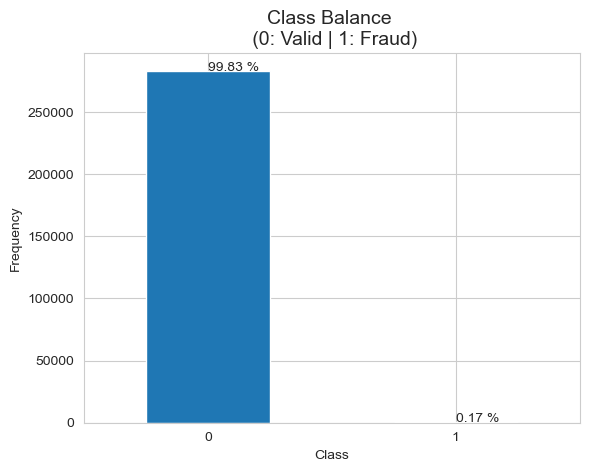

In [75]:
# Visualizing the class balance

# change pandas.value_counts to a non-deprecated function
count_classes = df_modified['Class'].value_counts(sort=True)
count_classes.plot(kind='bar', rot=0)

plt.title('Class Balance \n (0: Valid | 1: Fraud)', fontsize=14)
plt.xticks(range(2))
plt.xlabel('Class')
plt.ylabel('Frequency')

for index, value in enumerate(count_classes):
    plt.text(index, value, f"{round((value/len(df_modified['Class']))*100, 2)} %")
plt.show()


#### Basic info of transactions

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


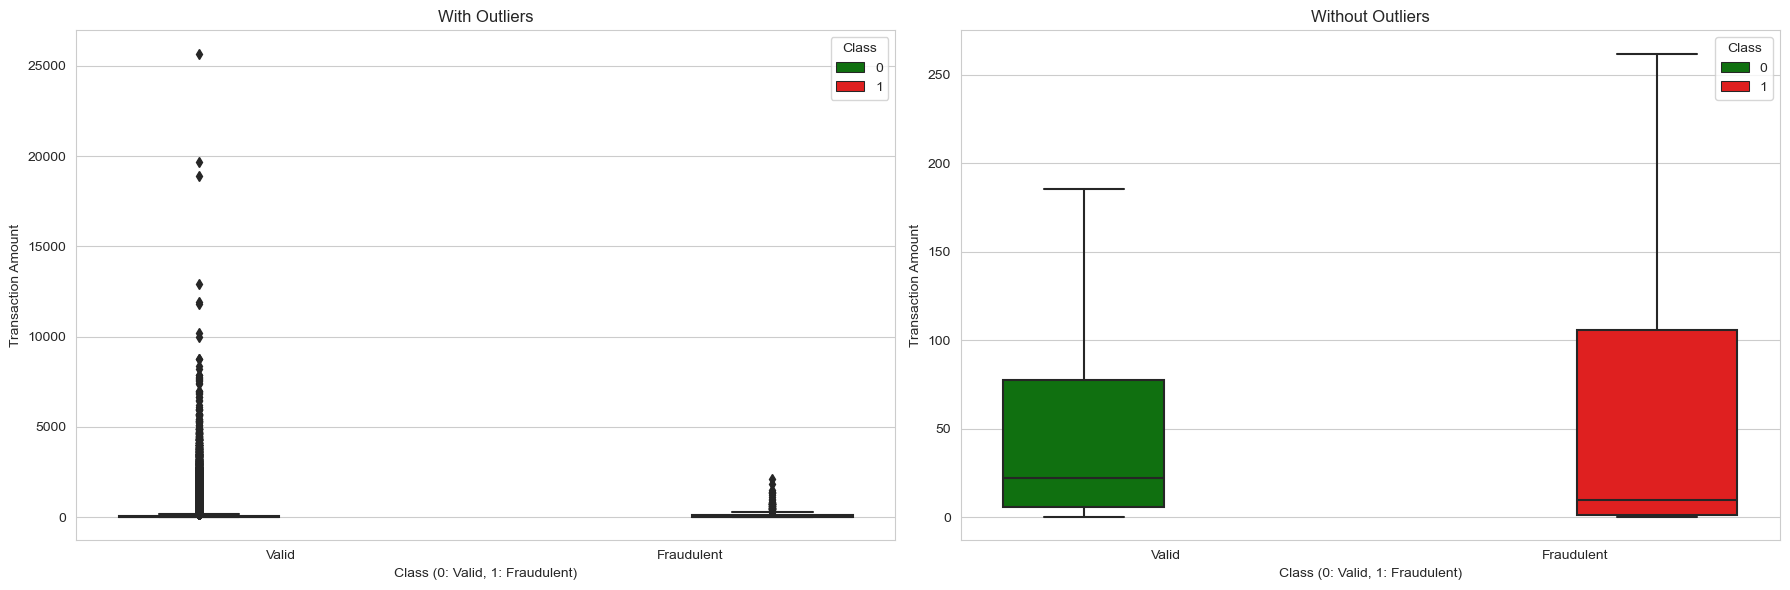

In [74]:
# mean amount of money per transaction by fraudulent transactions
print(Fraud.Amount.describe())
print(Valid.Amount.describe())

# Boxplot outliers and whiskers 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=df_modified, palette={1: 'red', 0: 'green'}, showfliers=True)
ax1.set_title('With Outliers')
ax1.set_xlabel('Class (0: Valid, 1: Fraudulent)')
ax1.set_ylabel('Transaction Amount')
ax1.set_xticklabels(['Valid', 'Fraudulent'])

sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=df_modified, palette={1: 'red', 0: 'green'}, showfliers=False)
ax2.set_title('Without Outliers')
ax2.set_xlabel('Class (0: Valid, 1: Fraudulent)')
ax2.set_ylabel('Transaction Amount')
ax2.set_xticklabels(['Valid', 'Fraudulent'])

plt.tight_layout()
plt.show()

#### Correlation matrix - before sampling data

In [12]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Shuffle the data before creating the subsamples
df_modified = df_modified.sample(frac=1)

# Get the fraud transactions
_fraud_df = df_modified[df_modified['Class'] == 1]

# Get the number of fraud transactions
num_fraud = len(_fraud_df)
print(num_fraud)

# Extract an equal number of non-fraud transactions
_non_fraud_df = df_modified[df_modified['Class'] == 0].iloc[:num_fraud]

normal_distributed_df = pd.concat([_fraud_df, _non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

473


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247995,153761.0,1.146259,1.403458,-4.159148,2.660107,-0.323217,-1.836071,-1.623740,0.259562,-1.132044,...,0.564450,0.445744,-0.141136,-0.265517,0.362260,-0.416062,0.507370,0.243744,51.37,1
40085,40086.0,1.083693,1.179501,-1.346150,1.998824,0.818034,-0.771419,0.230307,0.093683,-0.167594,...,-0.312000,-0.639700,-0.120249,-0.180218,0.609283,-0.339524,0.096701,0.114972,1.00,1
181299,124909.0,1.131230,-2.286270,-3.210620,-0.025234,-0.253346,-1.204819,1.255441,-0.708255,-1.088415,...,0.232482,-0.105857,-0.568188,0.809548,0.279912,0.926875,-0.244403,0.015043,597.90,0
76929,56806.0,0.016828,2.400826,-4.220360,3.462217,-0.624142,-1.294303,-2.986028,0.751883,-1.606672,...,0.285832,-0.771508,-0.265200,-0.873077,0.939776,-0.219085,0.874494,0.470434,1.00,1
83417,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91,1


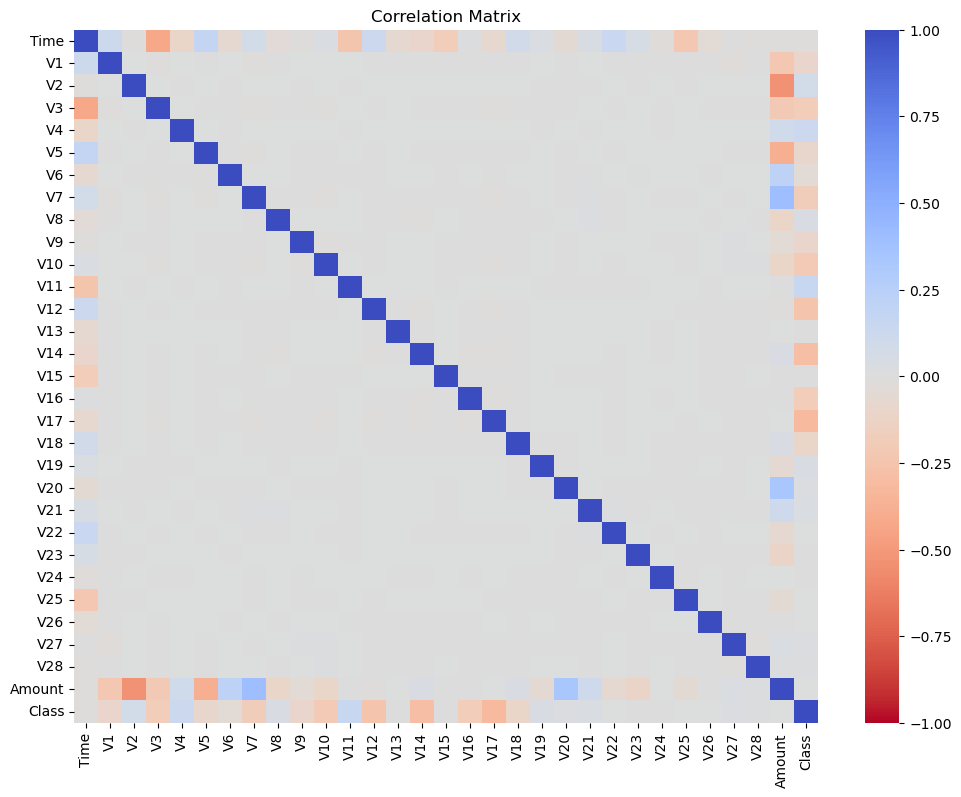

In [13]:
# Correlation Matrix
corrmat = df_modified.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

PCA (Principal Component Analysis) is a dimensionality reduction method that transforms features into orthogonal components. As a result, the transformed features (principal components) are uncorrelated with each other. Therefore, for the PCA-derived features (V1, V2, ... V28), a correlation matrix would show little to no correlation between them.
However, it's still valuable to check the correlation of non-PCA features (Time and Amount) with the target variable (Class). This can help determine if there's any relationship between these features and the probability of a transaction being fraudulent.

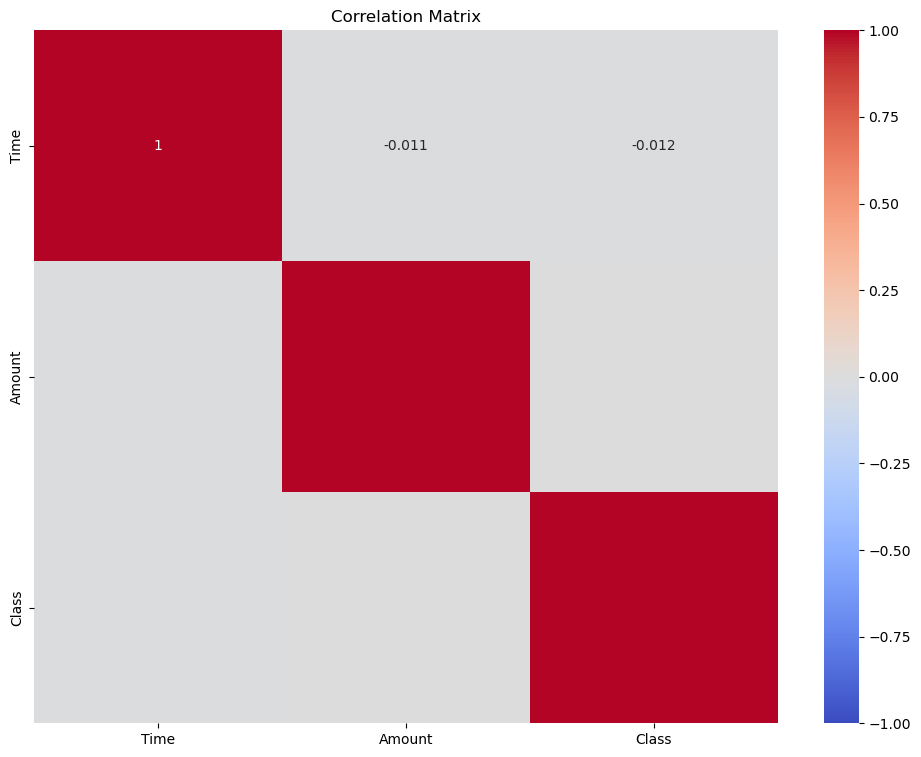

In [14]:
# Correlation Matrix between only Time, Amount and Class with values inside the graph
corrmat = df_modified[['Time', 'Amount', 'Class']].corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()



In [15]:
def plot_top_correlated_features(df, class_name, n_features=4):
    """
    Plot the top n features most correlated with the specified class.
    
    Parameters:
    - df: DataFrame with the data.
    - class_name: Name of the class to compute correlations.
    - n_features: Number of top features to plot (default is 4).
    """
    # Calculate correlation of each feature with the specified class
    feature_correlations = df.corr()[class_name].sort_values(ascending=False)

    # Selecting the top features excluding the specified class
    top_features = feature_correlations.iloc[1:n_features+1].index.tolist()

    # Extracting correlation values for these top features
    top_corr_values = feature_correlations[top_features]

    # Plotting the horizontal line graph
    plt.figure(figsize=(12, 7))
    top_corr_values.plot(kind='barh', color='skyblue')
    plt.title(f'Correlation of Top Features with {class_name}')
    plt.xlabel('Correlation Value')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()  # To display the highest correlated feature at the top
    plt.show()

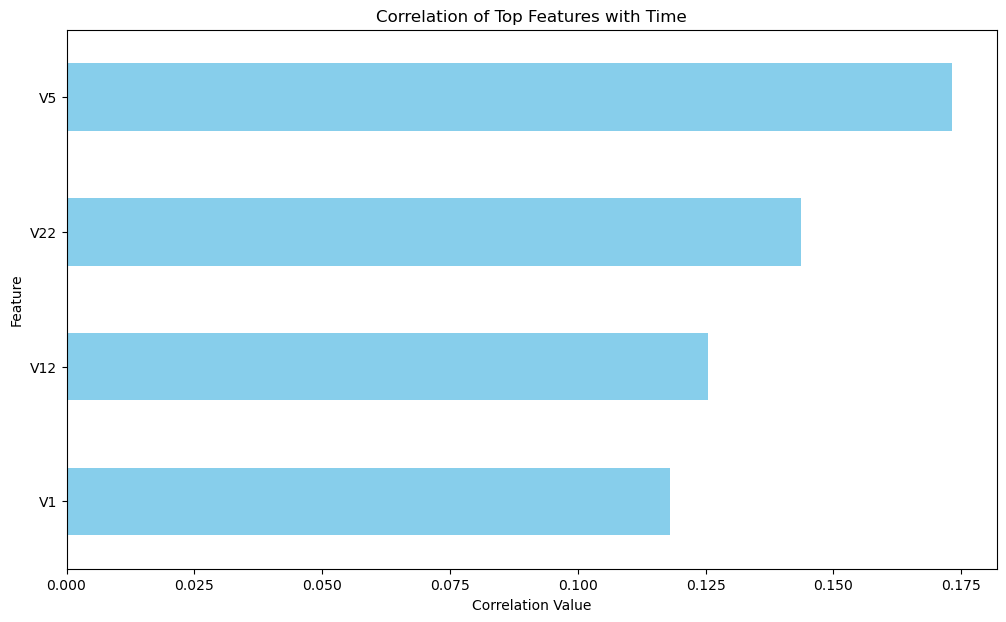

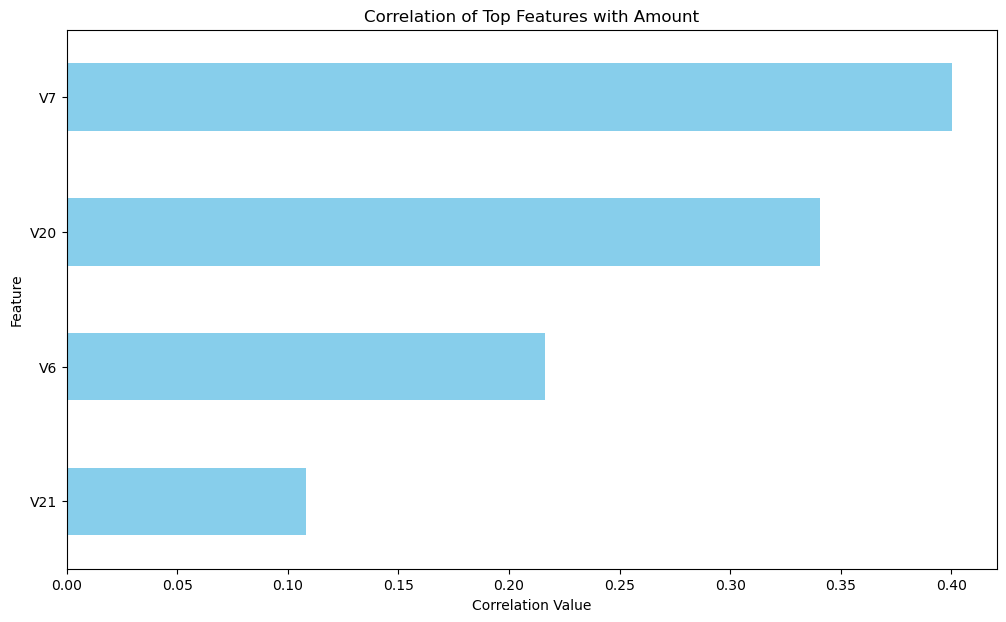

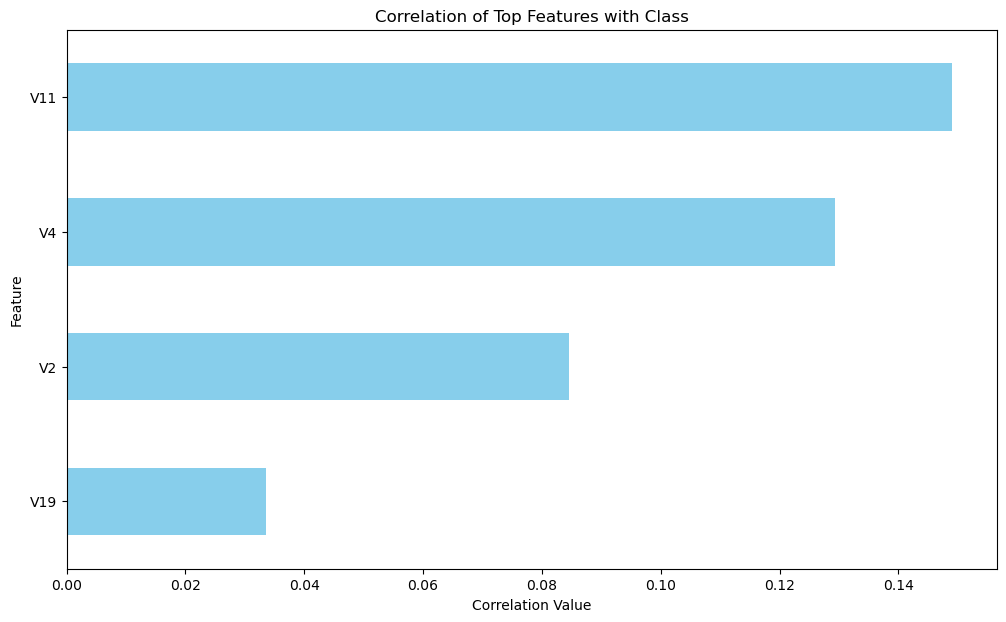

In [16]:
plot_top_correlated_features(df_modified, 'Time')
plot_top_correlated_features(df_modified, 'Amount')
plot_top_correlated_features(df_modified, 'Class')

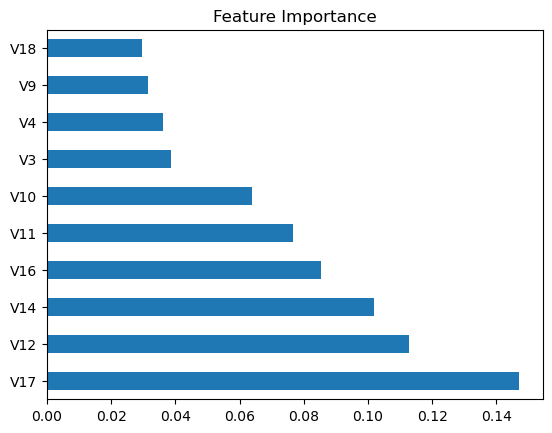

In [17]:
# Feature importance for class Time

from sklearn.ensemble import ExtraTreesClassifier

X = df_modified.iloc[:, :-1]
y = df_modified.iloc[:, -1]

model = ExtraTreesClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


#### Amounts over time distributions 

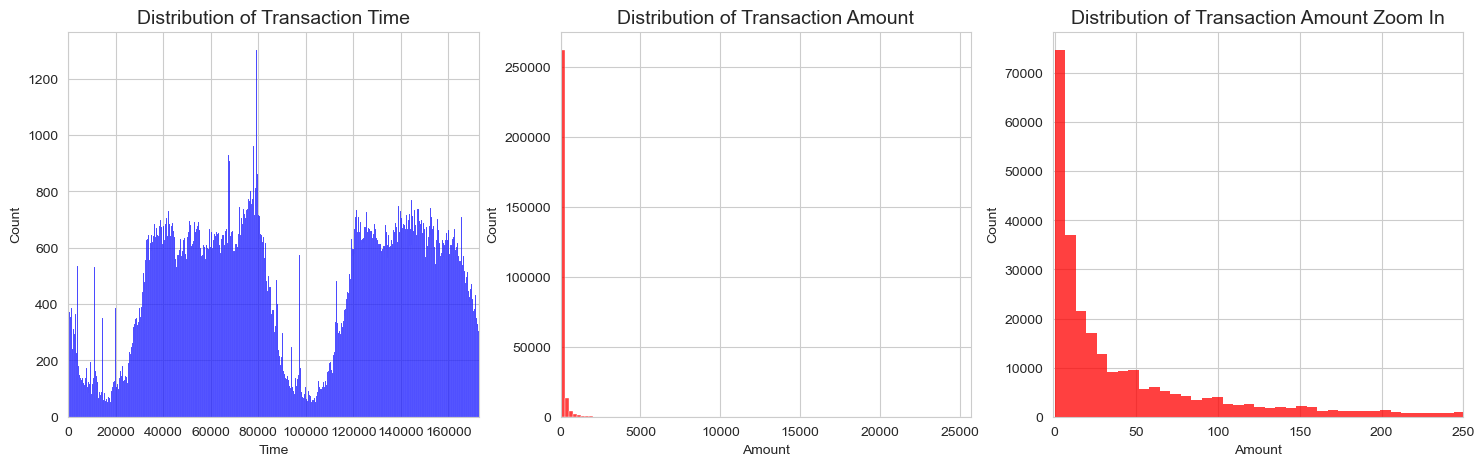

In [80]:
def distributions_over_time_plot(df_modified):
    # Plotting the distribution of 'Time' and 'Amount'
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(df_modified['Time'], ax=ax[0], color='b', bins=600)   
    ax[0].set_title('Distribution of Transaction Time', fontsize=14)
    ax[0].set_xlim([min(df_modified['Time']), max(df_modified['Time'])])

    sns.histplot(df_modified['Amount'], ax=ax[1], color='r', bins=100)  # Adjust the number of bins as needed
    ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
    ax[1].set_xlim([min(df_modified['Amount']), max(df_modified['Amount'])])

    sns.histplot(df_modified['Amount'], ax=ax[2], color='r', bins=4000, kde=False)
    ax[2].set_title('Distribution of Transaction Amount Zoom In', fontsize=14)
    ax[2].set_xlim([-1, 250])

    plt.show()

distributions_over_time_plot(df_modified)

#### Density plots and histograms of transactions (fraud and not) over time 

In [88]:
# Extract 'Time' data for each class
class_0 = df_modified.loc[df_modified['Class'] == 0]["Time"]
class_1 = df_modified.loc[df_modified['Class'] == 1]["Time"]

# Prepare data for the distribution plot
hist_data = [class_0, class_1]
group_labels = ['Valid', 'Fraud']

# Create the distribution plot
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig.update_layout(title='Credit Card Transactions Time Density Plot',
                  xaxis_title='Time [s]',
                  yaxis_title='Density')

# Change colors of the KDE lines for each class
colors = ['green', 'red']
for i, data in enumerate(fig.data):
    fig.data[i].line.color = colors[i]

# Display the plot
pyo.iplot(fig)

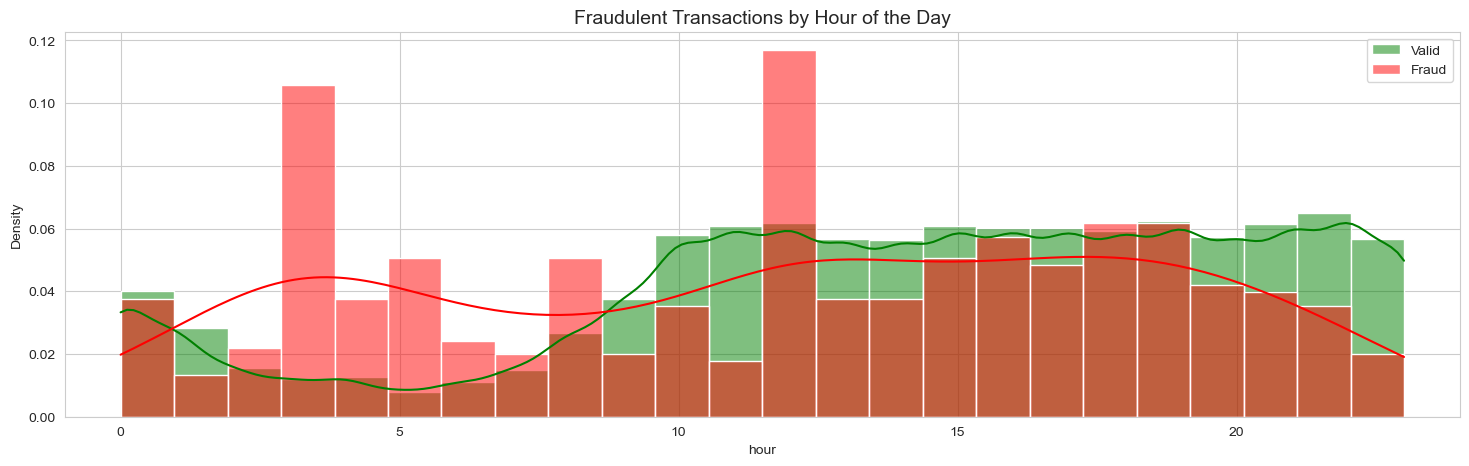

In [110]:
# Convert 'Time' to hours
df_modified['hour'] = df_modified['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

# Histogram and density for Non-Fraud
sns.histplot(df_modified[df_modified['Class'] == 0]['hour'], bins=24, color='g', ax=ax, label='Valid', stat='density', kde=True)

# Histogram and density for Fraud
sns.histplot(df_modified[df_modified['Class'] == 1]['hour'], bins=24, color='r', ax=ax, label='Fraud', stat='density', kde=True)

# Set up the legend, title, and axis limits
ax.legend()
ax.set_title('Fraudulent Transactions by Hour of the Day', fontsize=14)
ax.set_xlim([-1, 24])

plt.show()

In [108]:
def dist_valid_fraud_count(hh: int, df: pd.DataFrame):
    # Calculating the hour of the day from the 'Time' column
    df['hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % hh)

    # Setting up the plots
    fig, axs = plt.subplots(2, 1, figsize=(18, 10))

    # Plotting histogram for Non-Fraud (Class 0)
    sns.histplot(df[df['Class'] == 0]['hour'], bins=hh, color='g', ax=axs[0], kde=False)
    axs[0].set_title('Valid Transactions by Hour of the Day', fontsize=14)
    axs[0].set_xlim([-1, hh])
    axs[0].set_xlabel('Hour of the Day')
    axs[0].set_ylabel('Count')

    # Plotting histogram for Fraud (Class 1)
    sns.histplot(df[df['Class'] == 1]['hour'], bins=hh, color='r', ax=axs[1], kde=False)
    axs[1].set_title('Fraudulent Transactions by Hour of the Day', fontsize=14)
    axs[1].set_xlim([-1, hh])
    axs[1].set_xlabel('Hour of the Day')
    axs[1].set_ylabel('Count')

    # Adjusting the layout
    plt.tight_layout()

    # Display the plots
    plt.show()

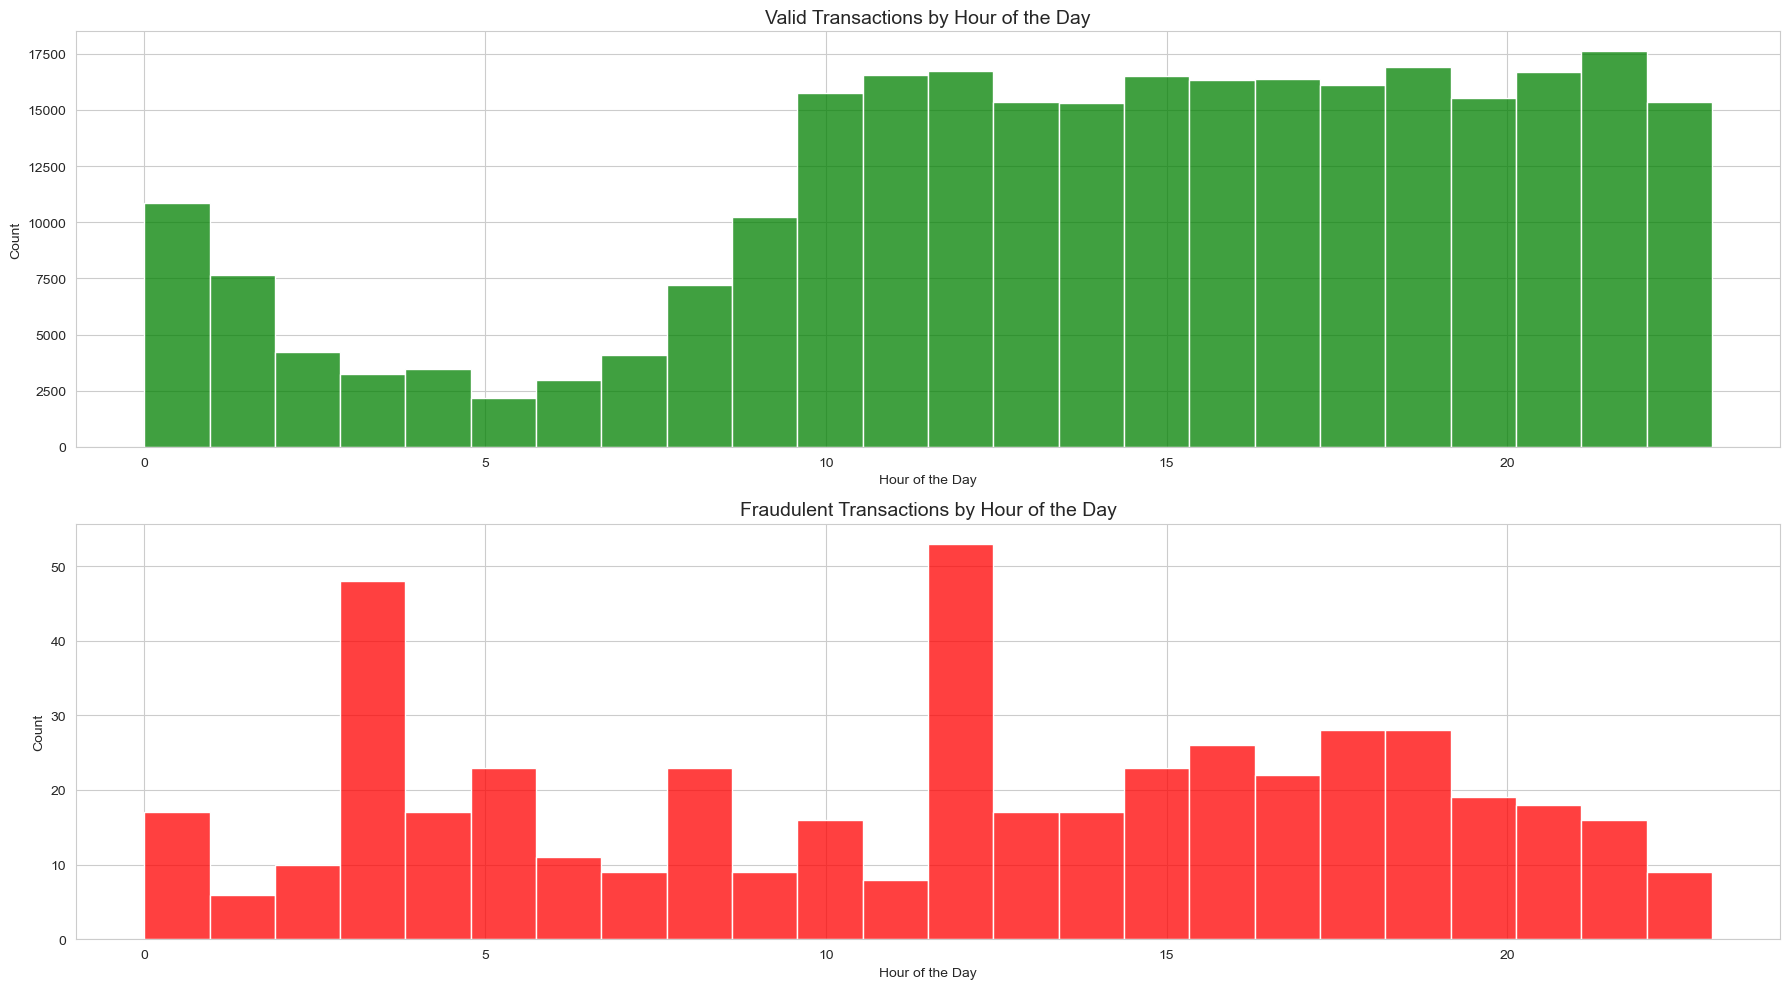

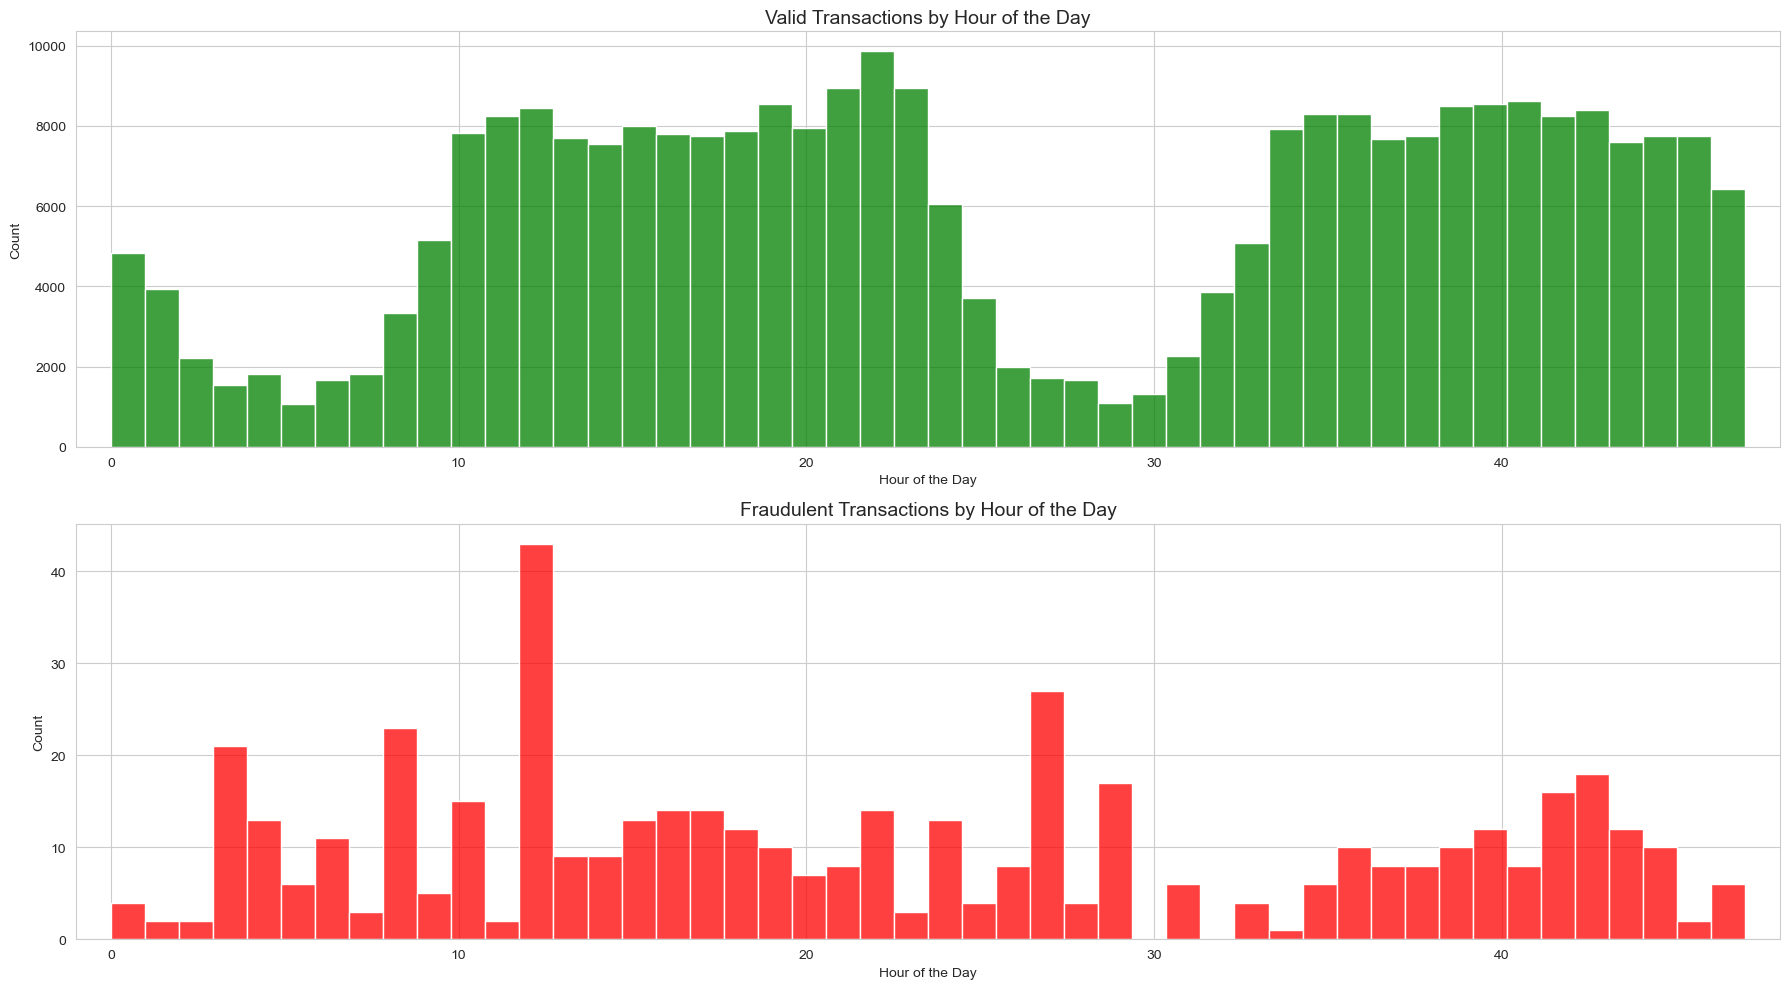

In [109]:
dist_valid_fraud_count(hh=24, df=df_modified)
dist_valid_fraud_count(hh=48, df=df_modified)


#### Top 5 by Range and Class

In [118]:
def bins_incrementation(bin_inc):
    # Define the bins in increments of x
    bins = list(range(0, int(df_modified['Amount'].max()) + bin_inc, bin_inc))

    # Create a 'binned_amount' column in df_modified
    df_modified['binned_amount'] = pd.cut(df_modified['Amount'], bins)

    # For fraud cases
    fraud_counts = df_modified[df_modified['Class'] == 1]['binned_amount'].value_counts().sort_values(ascending=False)
    for i in fraud_counts.index:
        fraud_counts[i] = fraud_counts[i]/sum(fraud_counts)*100
        
    # For non-fraud cases
    non_fraud_counts = df_modified[df_modified['Class'] == 0]['binned_amount'].value_counts().sort_values(ascending=False)
    for i in non_fraud_counts.index:
        non_fraud_counts[i] = non_fraud_counts[i]/sum(non_fraud_counts)*100

    return fraud_counts, non_fraud_counts

In [119]:
# Displaying top 5 common ranges in a plot

def top_amonts(df, _label):
    """Plot of top 5 percentage for amount transactions.

    Args:
        df_ (pd.DataFrame): percentage of rages
    """
    plt.figure(figsize=(12, 9))
    if _label == 'Fraud':
        df.head(5).plot(kind='bar', figsize=(12, 9), color='r')
    else:
        df.head(5).plot(kind='bar', figsize=(12, 9), color='g')
    # put pencentage on top of bars
    for index, value in enumerate(df.head(5)):
        plt.text(index, value + 0.5, str(round(value, 2))+'%')
    plt.xticks(rotation=90)
    plt.xlabel('Amount Range ($)')
    plt.ylabel('Percentage of Transactions')
    plt.title(f'Top 5 Frequency for {_label} Transactions')
    plt.show()


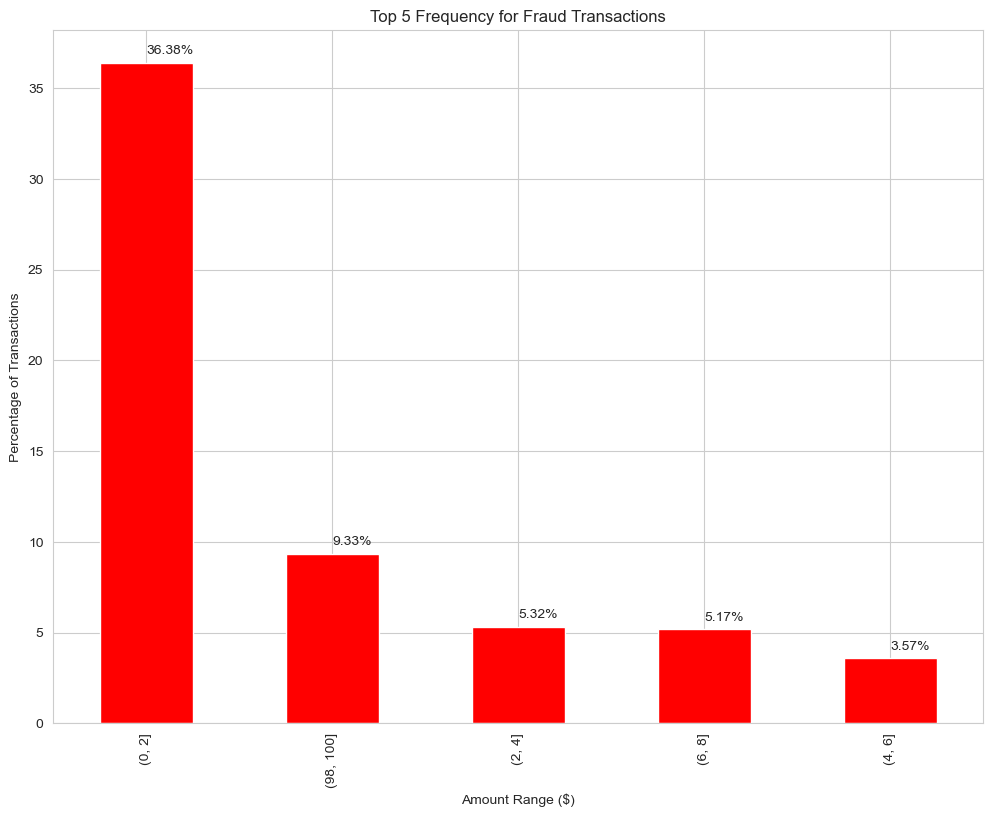

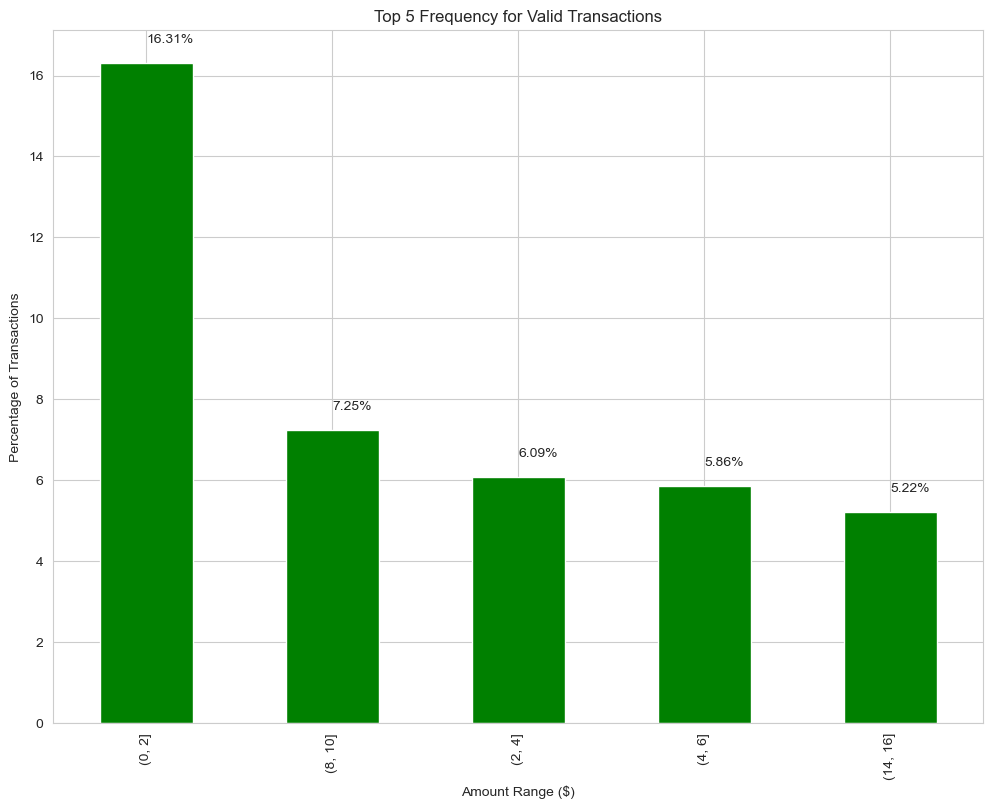

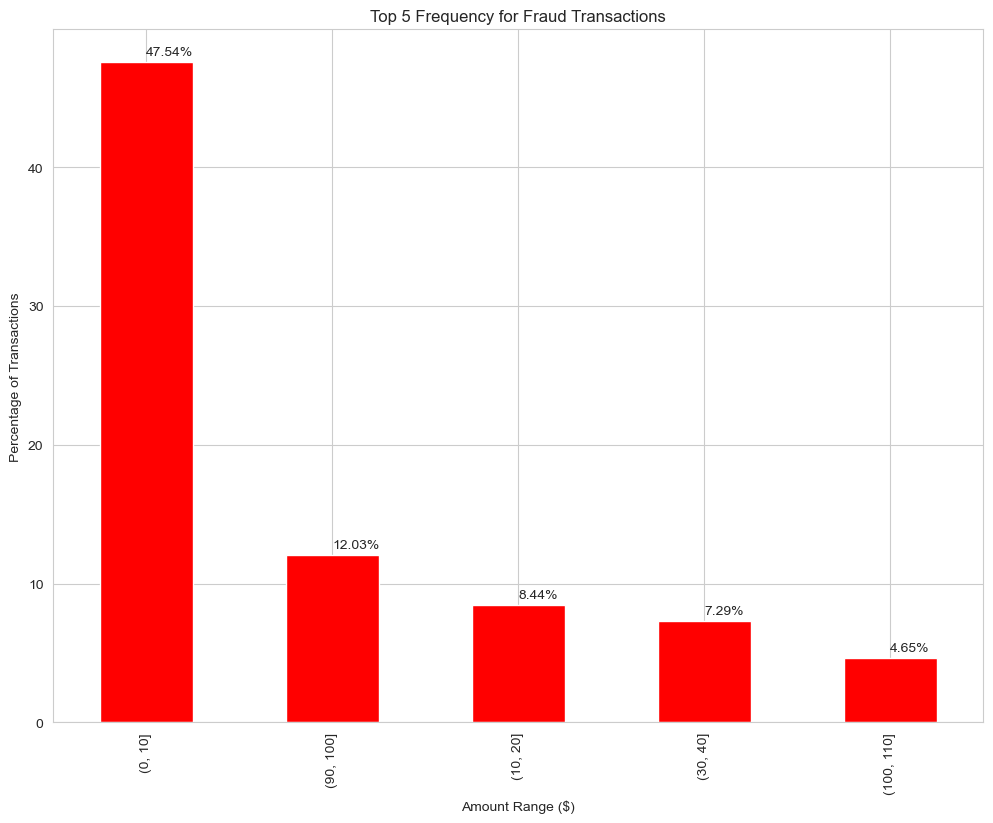

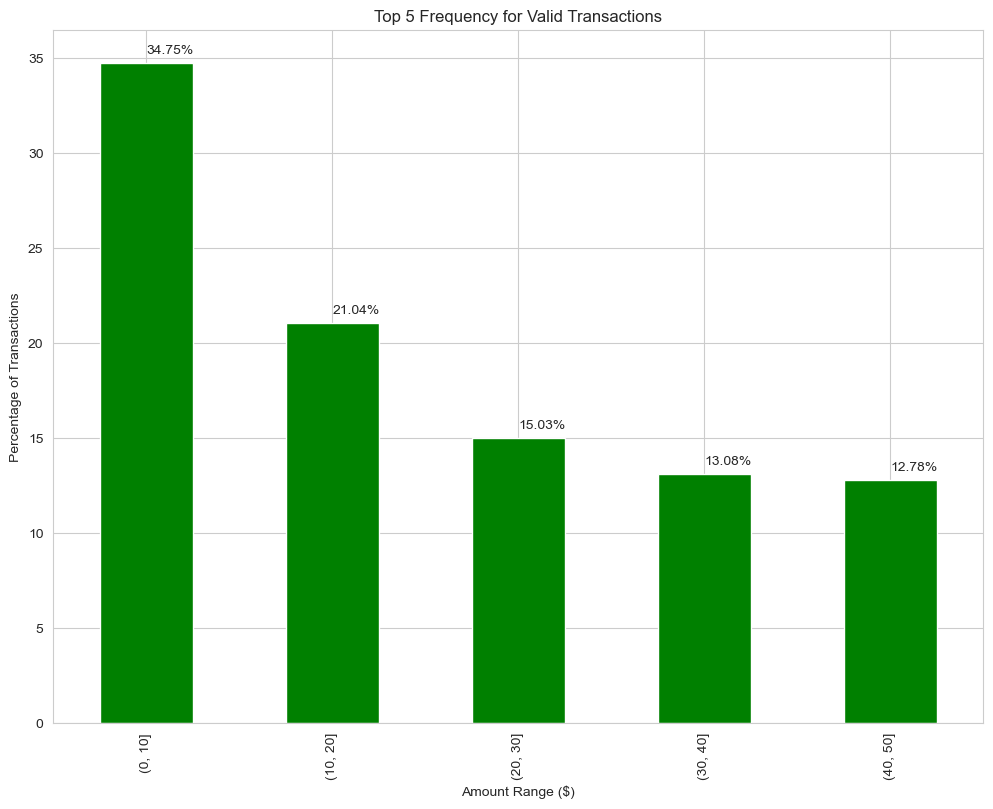

In [120]:
fraud_counts_2, non_fraud_counts_2 = bins_incrementation(2)
fraud_counts_10, non_fraud_counts_10 = bins_incrementation(10)

top_amonts(fraud_counts_2, 'Fraud')
top_amonts(non_fraud_counts_2, 'Valid')
top_amonts(fraud_counts_10, 'Fraud')
top_amonts(non_fraud_counts_10, 'Valid')

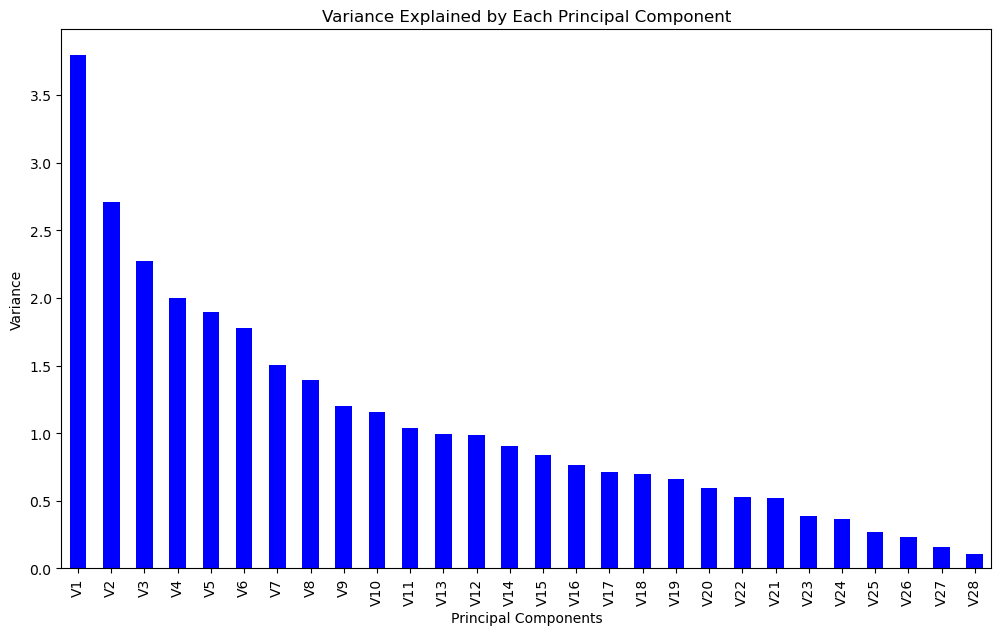

V1    3.794806
V2    2.711631
V3    2.276121
V4    1.999916
V5    1.896152
dtype: float64

In [24]:
#### Variation of the data

# Importing necessary libraries
import numpy as np

# Assuming the PCA-transformed features are named V1, V2, ... Vn
# Extracting only the PCA-transformed features
pca_columns = [col for col in df_modified.columns if 'V' in col]
pca_data = df_modified[pca_columns]

# Calculating the variance for each PCA feature
variances = pca_data.var()

# Sorting the variances in descending order to get top features
sorted_variances = variances.sort_values(ascending=False)

# Plotting the Scree plot
plt.figure(figsize=(12, 7))
sorted_variances.plot(kind='bar', color='blue')
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.show()

# Extracting top 5 features with the most variance
top_5_features = sorted_variances.head(5)
top_5_features


#### Graps of Min, Max, Median...

In [115]:
df_modified['48H'] = df_modified['Time'].apply(lambda x: np.floor(x / 3600))

ValueError: Could not interpret value `hour` for parameter `x`

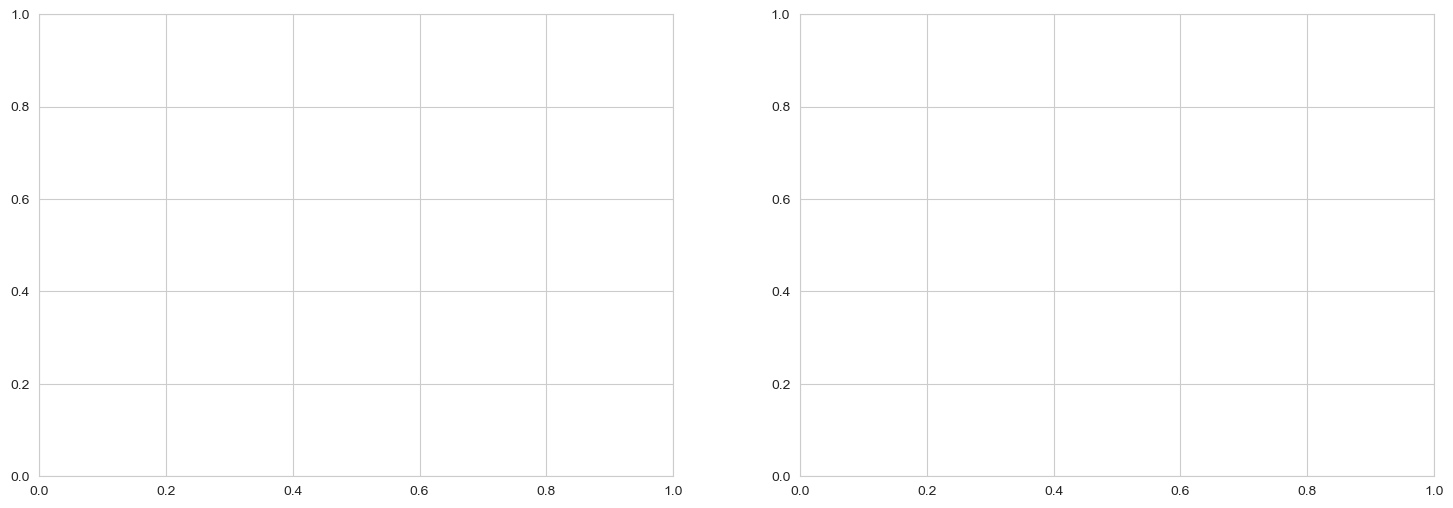

In [131]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="Sum", data=df_tmp.loc[df_tmp.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="hour", y="Sum", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.suptitle("Total Amount")
# add a subtitle to each plot
ax1.set_title("Valid Transactions")
ax2.set_title("Fraud Transactions")
# change x axis label
ax1.set_xlabel("Hours")
ax2.set_xlabel("Hours")
plt.show()



ValueError: Could not interpret value `48H` for parameter `x`

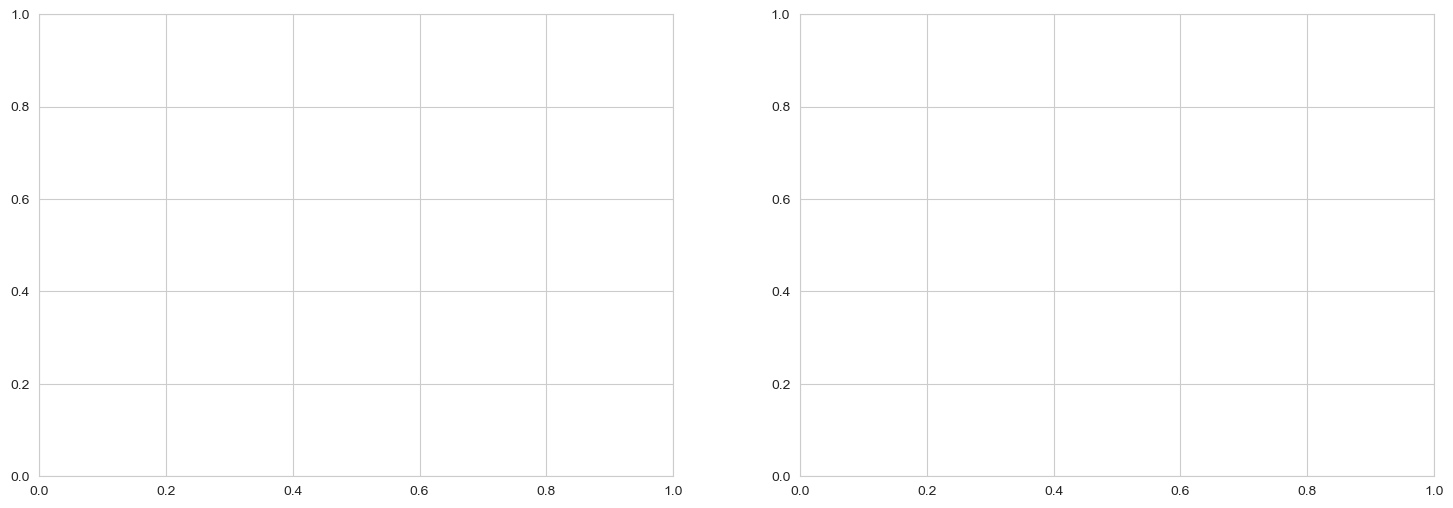

In [130]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="48H", y="Max", data=df.loc[df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="48H", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

ValueError: Could not interpret value `Hour` for parameter `x`

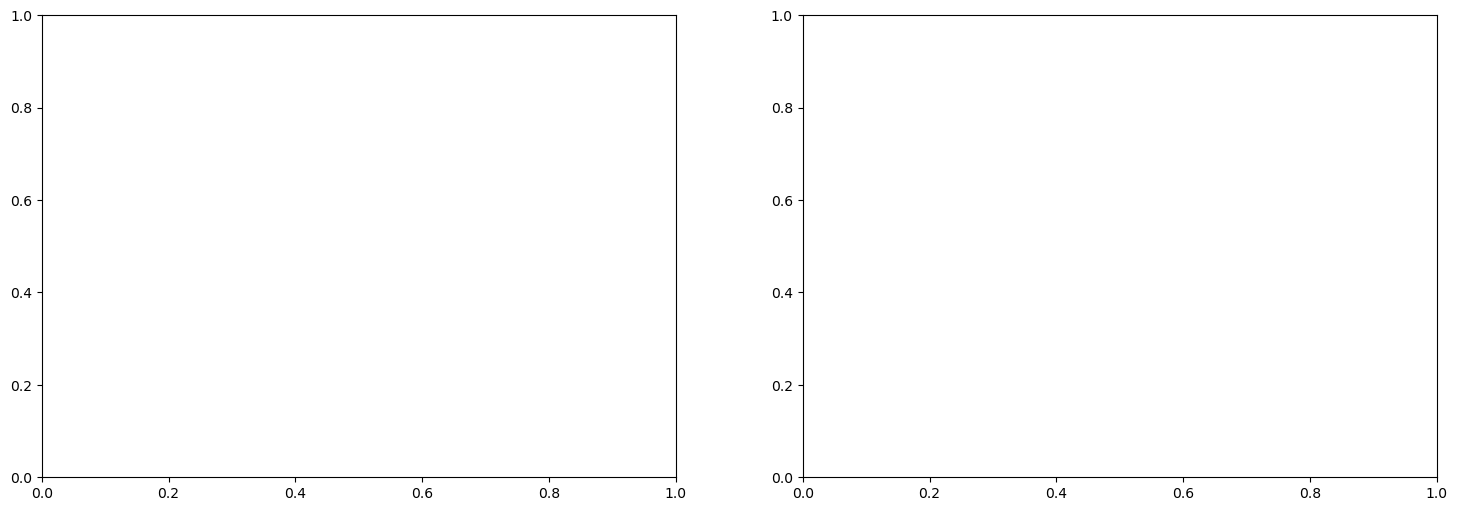

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

ValueError: Could not interpret value `Hour` for parameter `x`

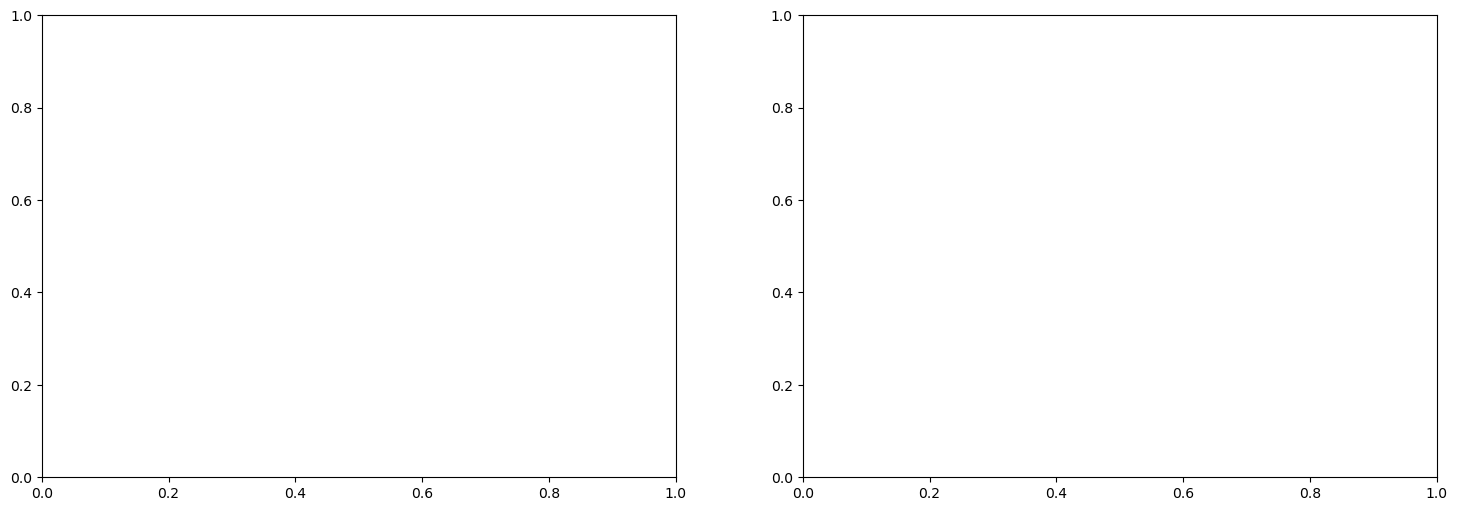

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

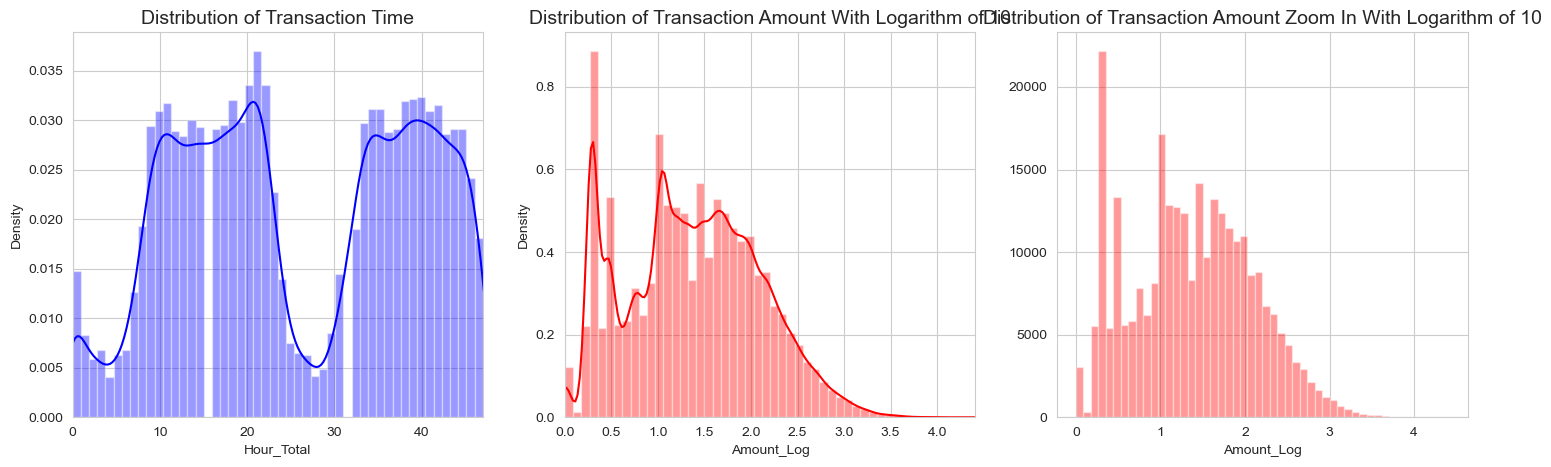

In [35]:
# Apply logarithm of 10 to the amount of money
df_modified['Amount_Log'] = np.log10(df_modified.Amount + 1) 

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.distplot(df_modified['48H'], ax=ax[0], color='b')   
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df_modified['48H']), max(df_modified['48H'])])

sns.distplot(df_modified['Amount_Log'], ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Amount With Logarithm of 10', fontsize=14)
ax[1].set_xlim([min(df_modified['Amount_Log']), max(df_modified['Amount_Log'])])

sns.distplot(df_modified['Amount_Log'], ax=ax[2], color='r',  kde=False)
ax[2].set_title('Distribution of Transaction Amount Zoom In With Logarithm of 10', fontsize=14)
#ax[2].set_xlim([-1, 250])

plt.show()

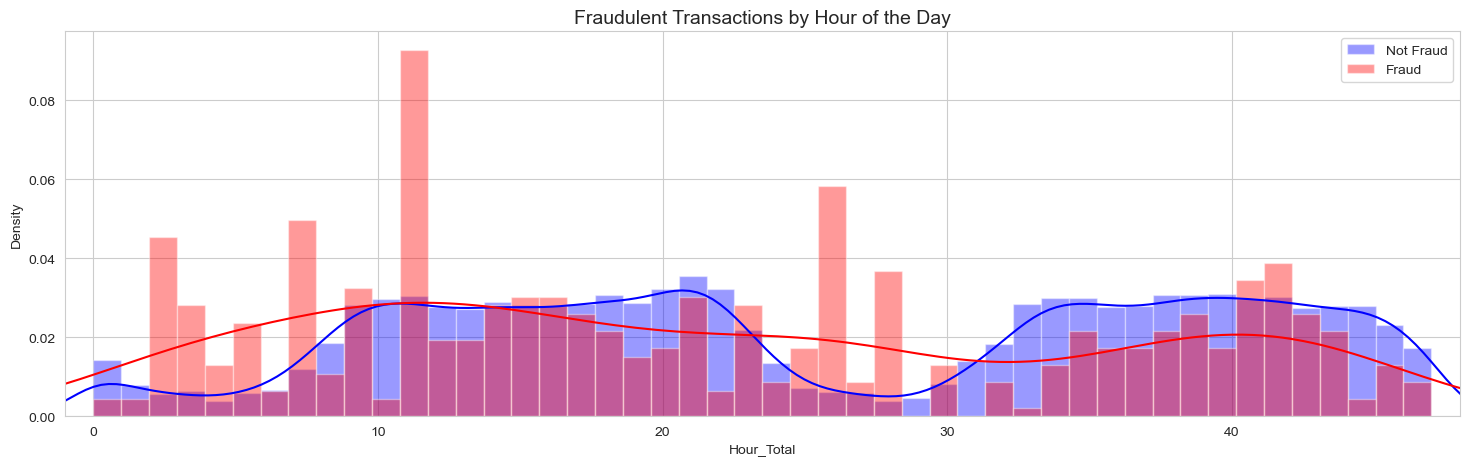

In [36]:
# Histogram based on the amount of money h by hour of the day
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

#df_modified['hour'] = df_modified['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
sns.distplot(df_modified[df_modified['Class'] == 0]['48H'], bins=48, color='b', ax=ax, label='Not Fraud')
sns.distplot(df_modified[df_modified['Class'] == 1]['48H'], bins=48, color='r', ax=ax, label='Fraud')
ax.legend()
ax.set_title('Fraudulent Transactions by Hour of the Day', fontsize=14)
ax.set_xlim([-1, 48])
plt.show()

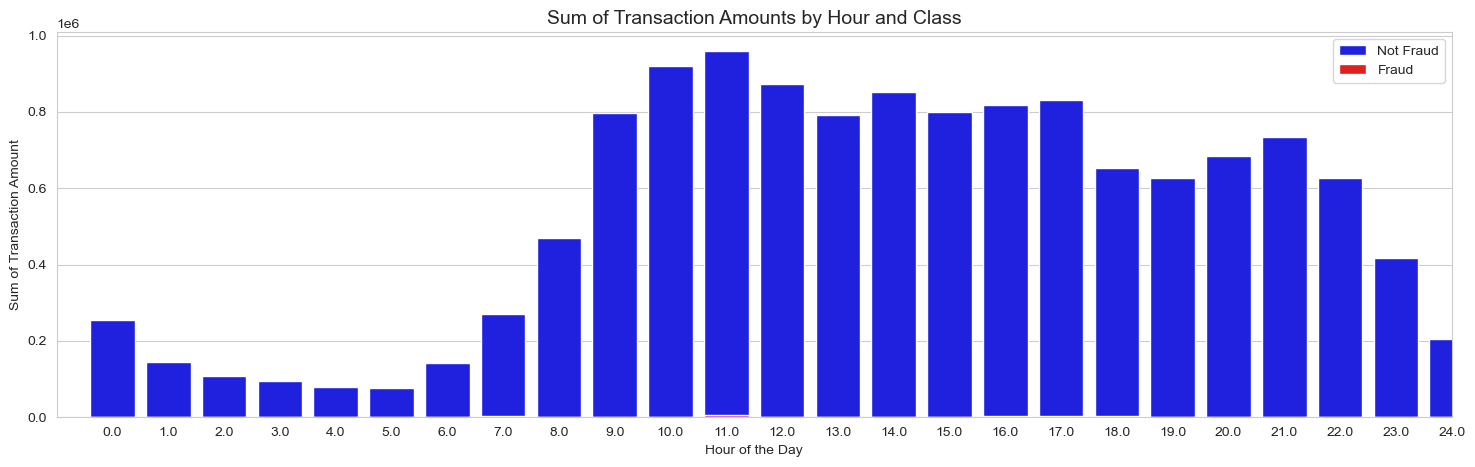

In [37]:
grouped_data = df_modified.groupby(['48H', 'Class'])['Amount'].sum().reset_index()

# Separate the data for each class
not_fraud = grouped_data[grouped_data['Class'] == 0]
fraud = grouped_data[grouped_data['Class'] == 1]

# Create a histogram plot
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

sns.barplot(x='48H', y='Amount', data=not_fraud, color='b', ax=ax, label='Not Fraud')
sns.barplot(x='48H', y='Amount', data=fraud, color='r', ax=ax, label='Fraud')

ax.legend()
ax.set_title('Sum of Transaction Amounts by Hour and Class', fontsize=14)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Sum of Transaction Amount')
ax.set_xlim([-1, 24])  # Adjust the x-axis limit to the actual range of hours (0 to 23)

plt.show()

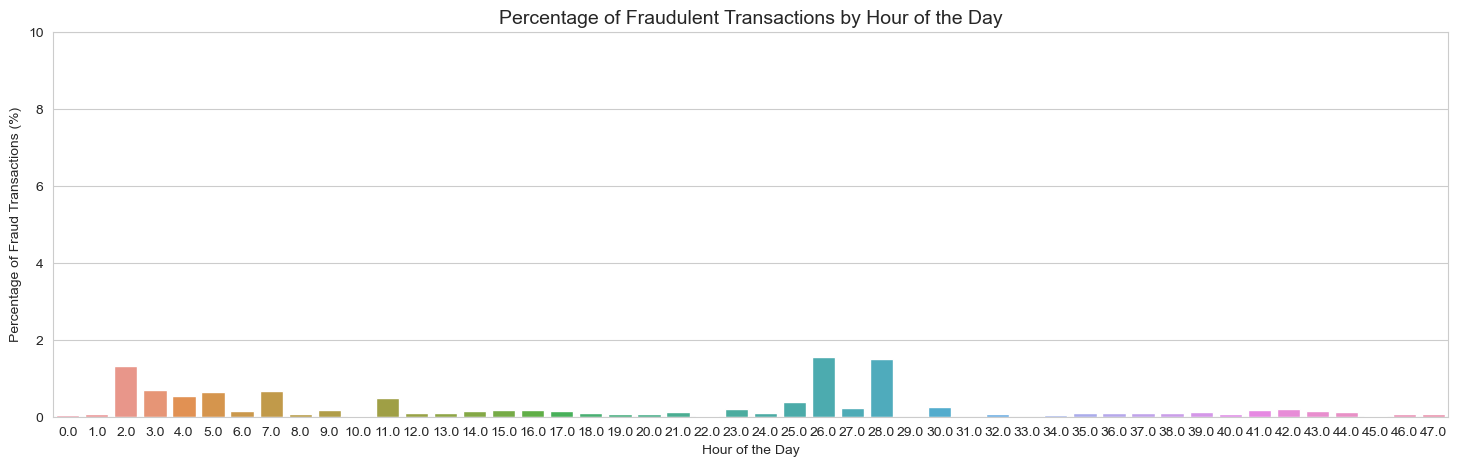

In [38]:
# Filter out transactions where the amount is zero
#zero_amount = df_modified[df_modified['Amount'] == 0]
#print()

# Group by '48H' and calculate the percentage of fraud transactions
fraud_percentage_by_hour = df_modified.groupby('48H')['Class'].mean() * 100

# Reset index to turn it into a DataFrame
fraud_percentage_by_hour = fraud_percentage_by_hour.reset_index()

# Plotting
plt.figure(figsize=(18, 5))
sns.barplot(x='48H', y='Class', data=fraud_percentage_by_hour)

plt.title('Percentage of Fraudulent Transactions by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Fraud Transactions (%)')
plt.ylim(0, 10)  # Set y-axis to range from 0 to 100 for percentage

plt.show()


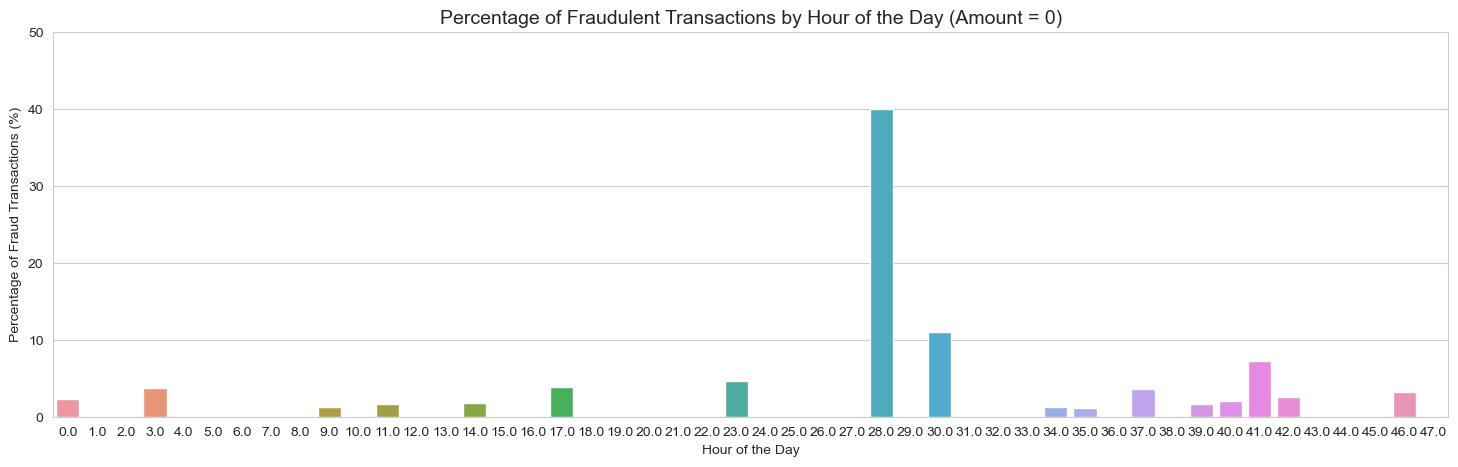

In [39]:
# Filter out transactions where the amount is zero
zero_amount = df_modified[df_modified['Amount'] == 0]


# Group by '48H' and calculate the percentage of fraud transactions
fraud_percentage_by_hour = zero_amount.groupby('48H')['Class'].mean() * 100

# Reset index to turn it into a DataFrame
fraud_percentage_by_hour = fraud_percentage_by_hour.reset_index()

# Plotting
plt.figure(figsize=(18, 5))
sns.barplot(x='48H', y='Class', data=fraud_percentage_by_hour)

plt.title('Percentage of Fraudulent Transactions by Hour of the Day (Amount = 0)', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Fraud Transactions (%)')
plt.ylim(0, 50)  # Set y-axis to range from 0 to 100 for percentage

plt.show()


In [40]:
import pandas as pd

# Assuming df_modified is your DataFrame and it contains 'Class' and 'Amount' columns

# Filter out transactions where the amount is zero
zero_amount = df_modified[df_modified['Amount'] == 0]

# Calculate the percentage of these transactions that are fraud
percentage_fraud = ((zero_amount['Class'] == 1).mean() * 100)

print(f"Percentage of Fraudulent Transactions with Amount 0: {percentage_fraud:.2f}%")


Percentage of Fraudulent Transactions with Amount 0: 1.38%


### Outliers

#### Interquartile Range Method

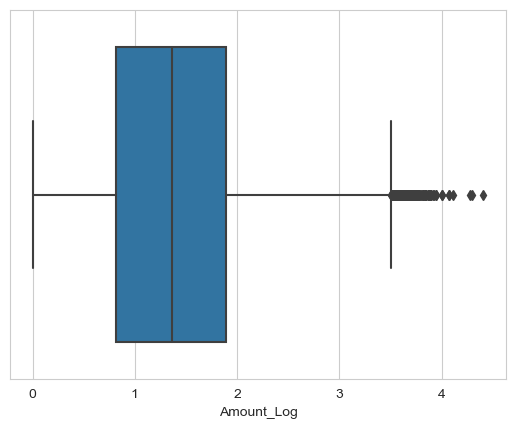

In [41]:
# Discover outliers in the dataset 

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset is df_modified

# Interquartile range to dataset with boxplot
sns.boxplot(x=df_modified['Amount_Log'])
plt.show()



In [42]:
# Calculate the 25th and 75th percentile of the 'Amount_Log' column
q25, q75 = np.percentile(df_modified['Amount_Log'], 25), np.percentile(df_modified['Amount_Log'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# Select observations outside the interquartile range
outliers_df = df_modified[(df_modified['Amount_Log'] < lower) | (df_modified['Amount_Log'] > upper)]

print('Identified outliers: %d' % len(outliers_df))

# Now outliers_df contains the full observations for the outliers


Identified outliers: 236


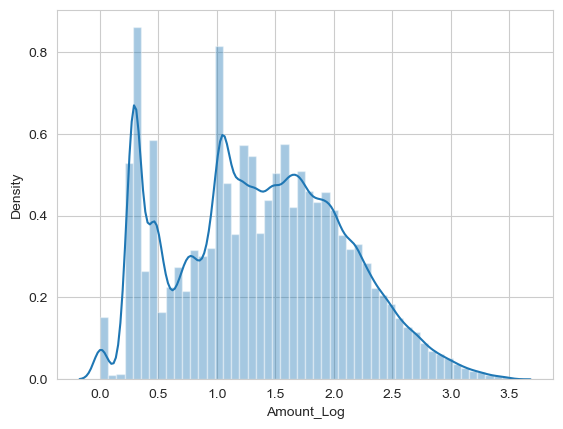

In [43]:
# Remove outliers from the dataset
df_modified_with_outliers = df_modified['Amount_Log'] 
df_modified = df_modified[(df_modified['Amount_Log'] > lower) & (df_modified['Amount_Log'] < upper)]

# Check the distribution of the 'Amount_Log' column
sns.distplot(df_modified['Amount_Log'])
plt.show()



In [44]:
# Remove Time, Amount, binned_amount and 48H columns
df_for_preddictions = df_modified.drop(['Time', 'Amount', 'binned_amount', '48H'], axis=1)

In [ ]:
"""
# supervised SVM,  random forest, feed-forward NN

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = df_for_preddictions.drop('Class', axis=1)
y = df_for_preddictions['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predicting using a supervised SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create a classifier object
clf = SVC(kernel='linear')

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the accuracy and classification report
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}%')
print(classification_report(y_test, y_pred))


"""

In [ ]:
"""# Same but for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a classifier object

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)

# Make predictions on the test set

y_pred = clf.predict(X_test)

# Print the accuracy and classification report
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}%')
print(classification_report(y_test, y_pred))

"""

In [ ]:
"""# Same but for Forward NN
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Create a classifier object
model = Sequential()

# Add layers to the model
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, verbose=0)

# Make predictions on the test set
y_pred = model.predict_classes(X_test)

# Print the accuracy and classification report
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}%')
print(classification_report(y_test, y_pred))

"""